In [3]:
# Setup and imports
import sys, os
sys.path.append('../scripts')

import torch
import numpy as np
import matplotlib.pyplot as plt
from data_generation import LineGenerator, DatasetGenerator
from dino_eval import run_linear_probe, prepare_from_generators

print('PyTorch:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())


c:\Users\realc\OneDrive\Documents\CoS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch: 2.8.0+cpu
CUDA available: False


In [8]:
# Generate dataset (20 samples per type, 5-degree steps)
line_gen = LineGenerator(image_size=(128, 128))
dataset_gen = DatasetGenerator(line_gen)
images, angles = prepare_from_generators(dataset_gen, samples_per_type=20, rotation_step=10)
print(f'Total images: {len(images)} | Unique angles: {len(set(angles))}')


Total images: 3600 | Unique angles: 36


In [9]:
# Run DINO linear probe evaluation
results = run_linear_probe(images, angles, model_name='vit_small_patch16_224.dino', batch_size=32)
results


c:\Users\realc\OneDrive\Documents\CoS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'model_name': 'vit_small_patch16_224.dino',
 'num_classes': 36,
 'train_samples': 2160,
 'val_samples': 720,
 'test_samples': 720,
 'val_accuracy': 0.35694444444444445,
 'test_accuracy': 0.375,
 'angle_to_class': {0: 0,
  10: 1,
  20: 2,
  30: 3,
  40: 4,
  50: 5,
  60: 6,
  70: 7,
  80: 8,
  90: 9,
  100: 10,
  110: 11,
  120: 12,
  130: 13,
  140: 14,
  150: 15,
  160: 16,
  170: 17,
  180: 18,
  190: 19,
  200: 20,
  210: 21,
  220: 22,
  230: 23,
  240: 24,
  250: 25,
  260: 26,
  270: 27,
  280: 28,
  290: 29,
  300: 30,
  310: 31,
  320: 32,
  330: 33,
  340: 34,
  350: 35},
 'class_to_angle': {0: 0,
  1: 10,
  2: 20,
  3: 30,
  4: 40,
  5: 50,
  6: 60,
  7: 70,
  8: 80,
  9: 90,
  10: 100,
  11: 110,
  12: 120,
  13: 130,
  14: 140,
  15: 150,
  16: 160,
  17: 170,
  18: 180,
  19: 190,
  20: 200,
  21: 210,
  22: 220,
  23: 230,
  24: 240,
  25: 250,
  26: 260,
  27: 270,
  28: 280,
  29: 290,
  30: 300,
  31: 310,
  32: 320,
  33: 330,
  34: 340,
  35: 350}}

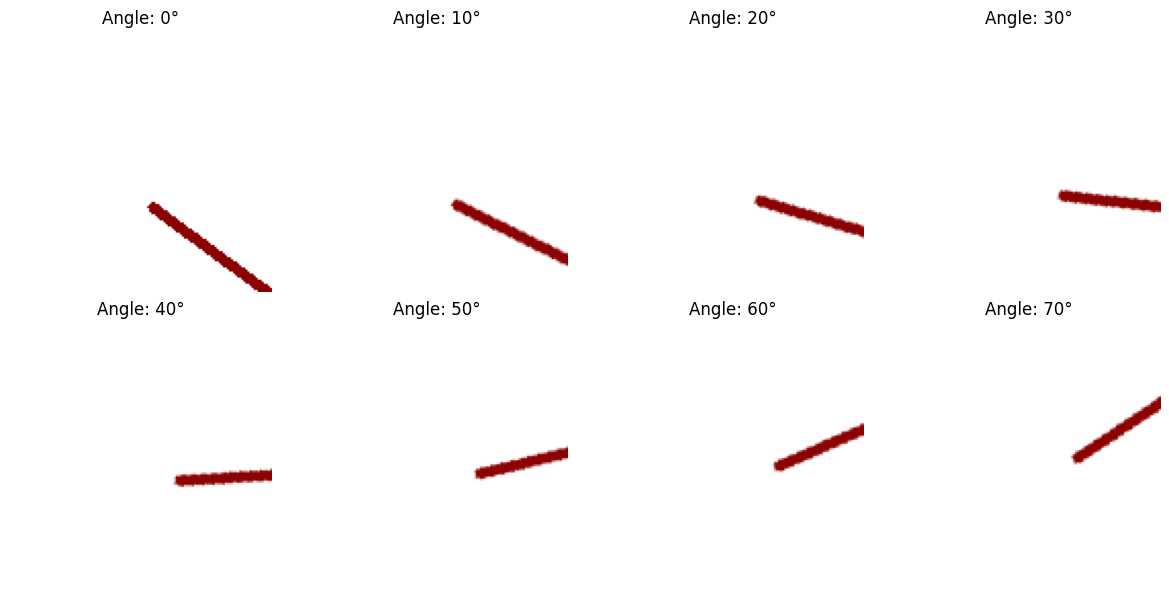

In [11]:
import matplotlib.pyplot as plt
import cv2

rows, cols = 2, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()
for i in range(rows*cols):
    img = images[i]
    if img.shape[-1] == 3:
        img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_show = img
    axes[i].imshow(img_show)
    axes[i].set_title(f'Angle: {angles[i]}°')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
